Curse of Dimensionality
* more dimensions might lead to a better result but it can make training really slow and much harder to find a good solution
* the distance between two points in really high dimensions is extremely large. There is a lot of empty space
* in theory, we need training observations to compensate for high dimensionalty. As the number of dimensions increase, the required number of observations increase


**solution**: reduce dimensionality
* trade-off between some information loss and handling the curse of dimensionality

## Main Approaches for DImensionality Reduction
#### Projection
real world problems, training observations are not spread out uniformly across all dimensions
* many features are almost constant, while others are highly correlated
* all training observations lie within a much lower-dimensional subspace of high-dimensional space


#### Manifold Learning
a d-dimensional manifold is a part of an n-dimensional space (where $ d < n $) that locally resemble a d-dimensional hyperplane

### PCA (Principal Component Analysis)
* identifies a hyperplane that lies closely to the data and then projects the data onto it
* choose a axis that preserves the maximum variance -> project onto it -> find another axis that is orthogonal to the first component
* utilizes a matrix factorization called SVD (Singular Value Decomposition)

In [ ]:
# Generating 3D data

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

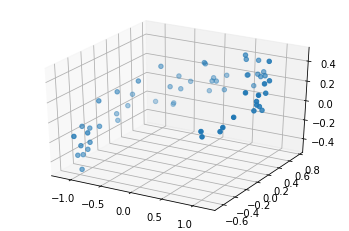

In [ ]:
# Plotting 3d scatter plot

ax = plt.axes(projection='3d')
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]
ax.scatter3D(x, y, z, 'gray')

In [ ]:
# Implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

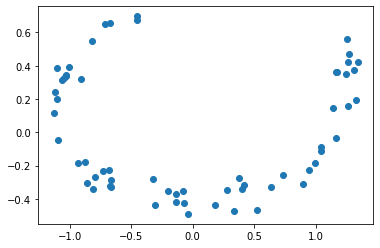

In [ ]:
# Plotting data after PCA

plt.scatter(X2D[:,0], X2D[:,1])

#### Explained Variance Ratio
* indicates the proportion of the dataset's variance that lies along each PC
* choose a number of dimensions that add up to a sufficiently large portion of the variance (i.e. 95%)

In [ ]:
# Viewing explained variance

pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

84.2% of the variance lies along the first component. 14.6% lies along the second component

In [ ]:
# Reading in MNIST data

## Imports
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Fetching the data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

## Loading X and y data
X = mnist["data"]
y = mnist["target"]

## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Using PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
## Set the n_components to d and run PCA again

In [ ]:
# Setting n_components to a ratio of variance to preserve

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

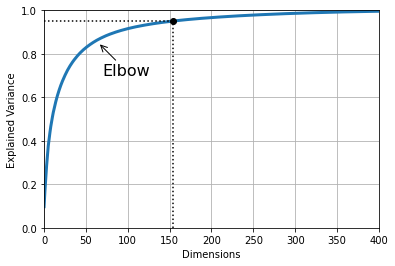

In [ ]:
# Plotting the explained variance as a function of the number of dimensions

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

## Draw the vertical line to (d, 0.95)
plt.plot([d, d], [0, 0.95], "k:")

## Draw the horizontal line to (d, 0.95)
plt.plot([0, d], [0.95, 0.95], "k:")

## Plot the dot on (d, 0.95)
plt.plot(d, 0.95, "ko")

## Annotate the elbow
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)

plt.grid(True)
plt.show()

### PCA for Compression
* possible to decompress the reduced dataset back to orignal dimensions but will not give back the original data
* reconstruction error: mean sqaured distance between original data and reconstructed data

Inverse Transformation Equation
\begin{equation} X_{recovered} = X_{d-proj}W_d^T \end{equation}

In [ ]:
# Decompressing the data

pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
# Functon to plot MNIST digits

import matplotlib as mpl

def plot_digits(observations, images_per_row=5, **options):
  
  size = 28
  
  ## If number of observations is less than images per row, then use number of observations
  images_per_row = min(len(observations), images_per_row)

  ## Reshaping each image to (28, 28)
  images = [observation.reshape(size, size) for observation in observations]

  ## Getting number of rows
  n_rows = (len(observations) - 1) // images_per_row + 1

  ## Creating a list of images for each row
  row_images = []

  ## Determining the number of empty cells in the image grid
  n_empty = n_rows * images_per_row - len(observations)

  ## Appending empty images into the list
  images.append(np.zeros((size, size * n_empty)))

  ## Looping through each row
  for row in range(n_rows):

    ### Getting images for each row
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))

  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap=mpl.cm.binary, **options)
  plt.axis("off")

Text(0.5, 1.0, 'Compressed')

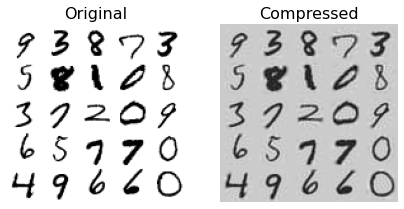

In [ ]:
# Plotting the Compression and Decompression images

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

### Randomized PCA
* uses a stochastic algorithm to quickly find an approximation of the first ***d*** principal components
* set **svd_solver** to "randomized"
* automatically uses randomized PCA if m or n is greater than 500 and d is less than 80% of m or n
* if it needs to fit in memory

In [ ]:
# Implementing Randomized PCA

rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA
* split training data into mini-batches and feed it to IPCA one batch at a time
* useful for large datasets or streamlining

In [ ]:
# Implementing Incremental PCA

from sklearn.decomposition import IncrementalPCA

## Splitting data into n_batches
n_batches = 100

inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array.split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

AttributeError: ignored

### Kernel PCA (kPCA)
* kernel trick: a math technique that implicitly maps observations into a very high-dimensional space (feature space) enabling nonlinear classification and regression
* a linear decision boundary in the high-dimensional feature space corresponds to complex nonlinear decision boundary in original space
* unsupervised learning technique
* often used as a preprocessing step on supervised learning tasks

In [ ]:
# CRASHED!
# # Implementing Kernel PCA

# from sklearn.decomposition import KernelPCA

# rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
# X_reduced = rbf_pca.fit_transform(X)

In [ ]:
# CRASHED! 
# # kPCA used as preprocessing step

# from sklearn.model_selection import GridSearchCV
# from sklearn.decomposition import KernelPCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# clf = Pipeline([
#   ("kpca", KernelPCA(n_components=2)),
#   ("log_reg", LogisticRegression())
# ])

# param_grid = [{
#   "kpca__gamma": np.linspace(0.03, 0.05, 10),
#   "kpca__kernel": ["rbf", "sigmoid"]
# }]

# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X, y)

### Unsupervised Tasks
* choose kernel and hyperparametsr that yield the lowest reconstruction error

## Locally Linear Embedding (LLE)
* nonlinear dimensionality reduction technique
* Manifold Learning technique that does not rely on projections
* measures how each training observation linearly relates to its closest neighbor
* then looks for a low-dimensional representation of the training set where thes local relationships are best preserved

\begin{equation} \hat{W} = argmin \sum_{i=1}^{m} (x^{(i)} - \sum_{j=1}^{m} w_{i,j}x^{(j)})^2 \end{equation}


1. for each training observation $x^{(i)}$, algorithm identifies *k* closest neighbors
2. reconstructs $x^{(i)}$ as a linear function of these neighbors
* finds weights $w_{i,j}$ such that the squared distance between $x^{(i)}$ and $\sum_{j=1}^{m} w_{i,j}x^{(j)}$ is as small as possible
3. $\hat{W}$ encodes the local linear relationships between the training observations
4. map the training observations into a d-dimentional space while preserving these local relationships as much as possible


In [ ]:
# Implementing LLE

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

### Other Dimensionality Reduction Techniques
* Random Projections
  * uses random linear projection to project the data to a lower-dimensional space
* Multidimensional Scaling (MDS)
  * Reduces dimensionality while trying to preserve the distances between observations
* Isomap
  * creates a graph by connecting each observation to its nearest neighbors. then reduces dimensionality while trying to preserve the *geodesic* distances between observations
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
  * reduces dimensionality while trying to keep similar observations close and dissimilar observations apart
* Linear Discriminant Analysis (LDA)
  * learns discriminative axes between the classes 
  * the projections keep claa


